In [3]:
!pip install keras-tcn --no-dependencies

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from tcn import TCN, tcn_full_summary
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [72]:
df=pd.read_csv('T2.csv')
df

,time,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
0,1/1/2018 0:00,380.047791,5.311336,416.328908,259.994904
1,1/1/2018 0:10,453.769196,5.672167,519.917511,268.641113
2,1/1/2018 0:20,306.376587,5.216037,390.900016,272.564789
3,1/1/2018 0:30,419.645904,5.659674,516.127569,271.258087
4,1/1/2018 0:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
52555,12/31/2018 23:10,2963.980957,11.404030,3397.190793,80.502724
52556,12/31/2018 23:20,1684.353027,7.332648,1173.055771,84.062599
52557,12/31/2018 23:30,2201.106934,8.435358,1788.284755,84.742500
52558,12/31/2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [73]:
df.drop('time', inplace=True, axis=1)

In [159]:
train_data = df.loc[0:42047] 
test_data = df.loc[42048:]
#val_data=train_data.loc[33638:] pehli form ke liye jab val data ko training ke akhir se nikala gaya akhir ka 20% 
val_data=df.loc[31537:42048]
targets=df['LV ActivePower (kW)']
train_target = train_data[['LV ActivePower (kW)']]
test_target = test_data[['LV ActivePower (kW)']]

In [160]:
val_data

,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
31537,2510.493896,10.659050,3138.295151,60.059780
31538,2343.063965,10.314030,2972.398269,60.250278
31539,2320.084961,10.208570,2915.113331,59.651138
31540,1981.072998,9.333455,2360.785150,56.142479
31541,1953.582031,9.196856,2271.589869,56.212002
...,...,...,...,...
42044,49.856054,1.645516,39.299767,80.923714
42045,52.704689,1.582637,38.884914,111.108299
42046,55.553324,1.494098,38.470060,150.824799
42047,58.401958,1.779607,38.055206,159.626099


In [161]:
train_data

,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645904,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
42043,47.007420,1.899933,39.714621,68.868103
42044,49.856054,1.645516,39.299767,80.923714
42045,52.704689,1.582637,38.884914,111.108299
42046,55.553324,1.494098,38.470060,150.824799


In [162]:
test_data

,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
42048,61.250593,2.188426,37.640352,192.658905
42049,64.099228,1.727103,37.225499,202.302994
42050,66.947862,1.489966,36.810645,228.031906
42051,69.796497,1.557715,36.395791,241.367493
42052,72.645131,1.505661,35.980937,273.082886
...,...,...,...,...
52555,2963.980957,11.404030,3397.190793,80.502724
52556,1684.353027,7.332648,1173.055771,84.062599
52557,2201.106934,8.435358,1788.284755,84.742500
52558,2515.694092,9.421366,2418.382503,84.297913


In [163]:
x_train = train_data
x_test = test_data
y_train = train_target
y_test = test_target
x_val = val_data
y_val = val_data[['LV ActivePower (kW)']]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(42048, 4)
(10512, 4)
(42048, 1)
(10512, 1)
(10512, 4)
(10512, 1)


In [164]:
y_val.shape

(10512, 1)

In [165]:
#x_train = x_train.to_numpy()

In [166]:
#print(x_train)

In [167]:
RS = RobustScaler()
x_train = RS.fit_transform(x_train)
x_test  = RS.fit_transform(x_test)
y_train = RS.fit_transform(y_train)
y_test  = RS.fit_transform(y_test)
x_val = RS.fit_transform(x_val)
y_val = RS.fit_transform(y_val)

In [168]:
x_train.shape

(42048, 4)

In [169]:
n_features = x_train.shape[1]
n_features

4

In [170]:
x_train.shape

(42048, 4)

In [171]:
y_test.shape

(10512, 1)

In [172]:
x_train = x_train.reshape(-1,1,n_features)
x_test  = x_test.reshape(-1,1,n_features)
y_train = y_train.reshape(-1,1)
y_test  = y_test.reshape(-1,1)
x_val  = x_val.reshape(-1,1,n_features)
y_val  = y_val.reshape(-1,1)

In [173]:
y_val.shape

(10512, 1)

In [174]:
#db = RS.inverse_transform(x_train)

In [175]:
#print(db)

In [176]:
print(y_train.shape)
print(y_val.shape)
#print(y_train.shape)
#print(y_test.shape)

(42048, 1)
(10512, 1)


In [177]:
n_features = df.shape[1]


n_epochs = 10
n_splits =  2

In [178]:
from tensorflow.keras.callbacks import Callback

In [179]:
from tcn import compiled_tcn, tcn_full_summary

In [180]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

In [181]:
len(test_data)

10512

In [128]:
#Walk Forward-validation aur validation_data jo training data ka akhri 20% hai
kf = TimeSeriesSplit(n_splits=n_splits)
test_preds = []

for fold, (train_idx, test_idx) in enumerate(kf.split(df, targets)):
    print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)
    X_train, X_valid = x_train, x_val
    y_train, Y_valid = targets[train_idx], y_val


scheduler = tf.keras.optimizers.schedules.ExponentialDecay(1e-3, 200*((len(test_data)*0.8)/1024), 1e-5)
model = keras.models.Sequential([
    TCN(input_shape=(1,n_features),
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8,16],
        padding='causal',
        activation='relu',
        return_sequences=True,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    keras.layers.Dense(1)
])

model.summary()
model.compile(optimizer="adam", loss="mape",
                  metrics=keras.metrics.MeanAbsolutePercentageError())

print('Train...')
history=model.fit(x_train, x_train,
                  epochs=n_epochs, 
                  verbose=2,
                  batch_size=512,
                  validation_data=(X_valid, Y_valid),
                  callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])
wind=model.predict(x_test)
print("prediction shape:", wind.shape)


--------------- > Fold 1 < ---------------
--------------- > Fold 2 < ---------------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_3 (TCN)                 (None, 1, 32)             196640    
                                                                 
 dense_3 (Dense)             (None, 1, 1)              33        
                                                                 
Total params: 196,673
Trainable params: 196,673
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/10
83/83 - 36s - loss: 873.8863 - mean_absolute_percentage_error: 873.8863 - val_loss: 178.1783 - val_mean_absolute_percentage_error: 178.1783 - lr: 0.0010 - 36s/epoch - 430ms/step
Epoch 2/10
83/83 - 31s - loss: 616.4615 - mean_absolute_percentage_error: 616.4615 - val_loss: 238.3303 - val_mean_absolute_percentage_error: 238.3303 - lr: 9.9

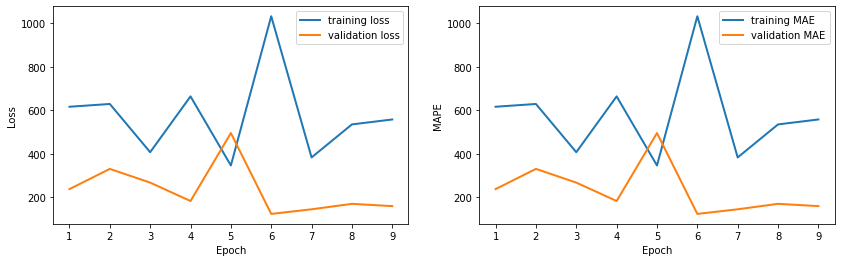

In [129]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

In [130]:
wind = wind.reshape( wind.shape[0],(wind.shape[1]*wind.shape[2]))


In [131]:
y_test = RS.inverse_transform(y_test)
wind = RS.inverse_transform(wind)

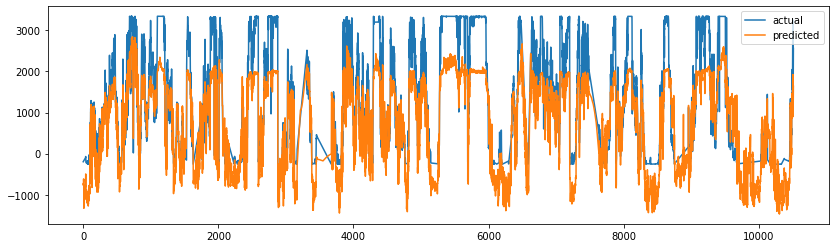

In [132]:
plt.figure(figsize=(14, 4))
#plt.subplot(1, 3, 1)
#plt.plot(y_test,label='actual')
#plt.legend()
#plt.subplot(1, 3, 2)
#plt.plot(wind,label='predicted')
#plt.legend()
#plt.subplot(1, 3, 3)
plt.plot(y_test,label='actual')
plt.plot(wind,label='predicted')
plt.legend()
plt.show()

In [152]:
#without walk_forward validation aur validation data == testing data
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(1e-3, 200*((len(test_data)*0.8)/1024), 1e-5)
model = keras.models.Sequential([
    TCN(input_shape=(1,n_features),
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8,16],
        padding='causal',
        activation='relu',
        return_sequences=True,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    keras.layers.Dense(1)
])

model.summary()
model.compile(optimizer="adam", loss="mape",
                  metrics=keras.metrics.MeanAbsolutePercentageError())

print('Train...')
history=model.fit(x_train, x_train,
                  epochs=n_epochs, 
                  verbose=2,
                  batch_size=512,
                  validation_data=(x_test, y_test),
                  callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])
wind=model.predict(x_test)
print("prediction shape:", wind.shape)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_5 (TCN)                 (None, 1, 32)             196640    
                                                                 
 dense_5 (Dense)             (None, 1, 1)              33        
                                                                 
Total params: 196,673
Trainable params: 196,673
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/10
83/83 - 37s - loss: 593.9469 - mean_absolute_percentage_error: 593.9469 - val_loss: 4187.3037 - val_mean_absolute_percentage_error: 4187.3037 - lr: 0.0010 - 37s/epoch - 447ms/step
Epoch 2/10
83/83 - 33s - loss: 331.1393 - mean_absolute_percentage_error: 331.1393 - val_loss: 3786.9395 - val_mean_absolute_percentage_error: 3786.9395 - lr: 9.9302e-04 - 33s/epoch - 398ms/step
Epoch 3/10
83/83 - 33s - loss: 287.7399 - mean_ab

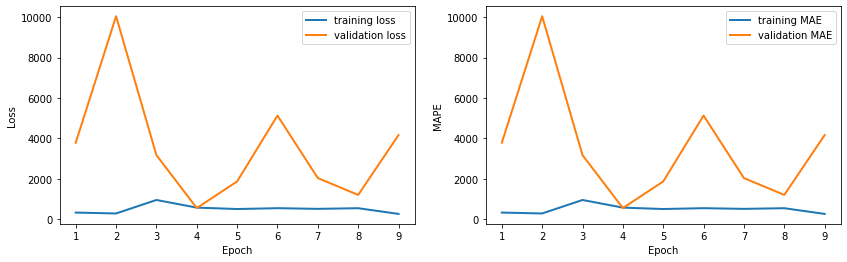

In [153]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

In [154]:
wind = wind.reshape( wind.shape[0],(wind.shape[1]*wind.shape[2]))


In [155]:
y_test = RS.inverse_transform(y_test)
wind = RS.inverse_transform(wind)

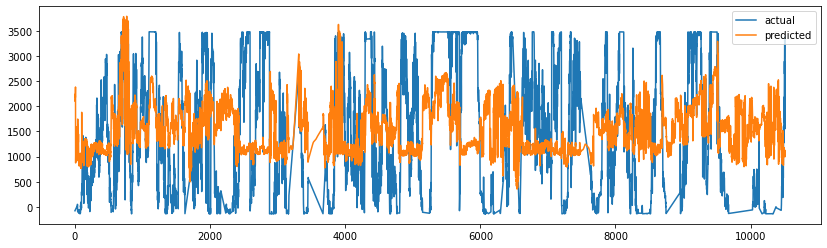

In [156]:
plt.figure(figsize=(14, 4))
#plt.subplot(1, 3, 1)
#plt.plot(y_test,label='actual')
#plt.legend()
#plt.subplot(1, 3, 2)
#plt.plot(wind,label='predicted')
#plt.legend()
#plt.subplot(1, 3, 3)
plt.plot(y_test,label='actual')
plt.plot(wind,label='predicted')
plt.legend()
plt.show()

In [182]:
# Without Walk Forward validation aur Validation data ko lia gaya overall datase 
#train_data 60% shoro ka
#validation_data 20% darmiyaan ka
#testing data 20% aakhir ka
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(1e-3, 200*((len(test_data)*0.8)/1024), 1e-5)
model = keras.models.Sequential([
    TCN(input_shape=(1,n_features),
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8,16],
        padding='causal',
        activation='relu',
        return_sequences=True,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    keras.layers.Dense(1)
])

model.summary()
model.compile(optimizer="adam", loss="mape",
                  metrics=keras.metrics.MeanAbsolutePercentageError())

print('Train...')
history=model.fit(x_train, x_train,
                  epochs=n_epochs, 
                  verbose=2,
                  batch_size=512,
                  validation_data=(x_val, y_val),
                  callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])
wind=model.predict(x_test)
print("prediction shape:", wind.shape)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_6 (TCN)                 (None, 1, 32)             196640    
                                                                 
 dense_6 (Dense)             (None, 1, 1)              33        
                                                                 
Total params: 196,673
Trainable params: 196,673
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/10
83/83 - 37s - loss: 740.4603 - mean_absolute_percentage_error: 740.4603 - val_loss: 166.7866 - val_mean_absolute_percentage_error: 166.7866 - lr: 0.0010 - 37s/epoch - 441ms/step
Epoch 2/10
83/83 - 32s - loss: 571.6705 - mean_absolute_percentage_error: 571.6705 - val_loss: 206.4164 - val_mean_absolute_percentage_error: 206.4164 - lr: 9.9302e-04 - 32s/epoch - 380ms/step
Epoch 3/10
83/83 - 32s - loss: 749.9842 - mean_absolu

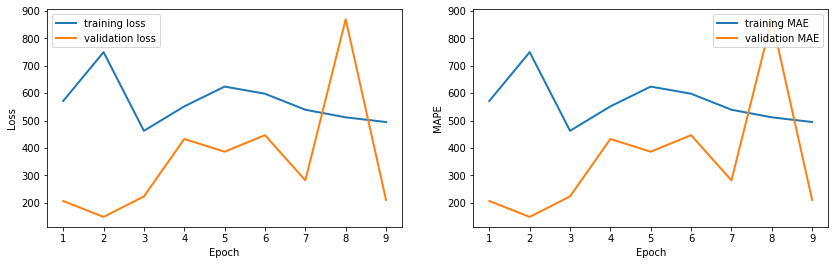

In [183]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

In [184]:
wind = wind.reshape( wind.shape[0],(wind.shape[1]*wind.shape[2]))


In [185]:
y_test = RS.inverse_transform(y_test)
wind = RS.inverse_transform(wind)

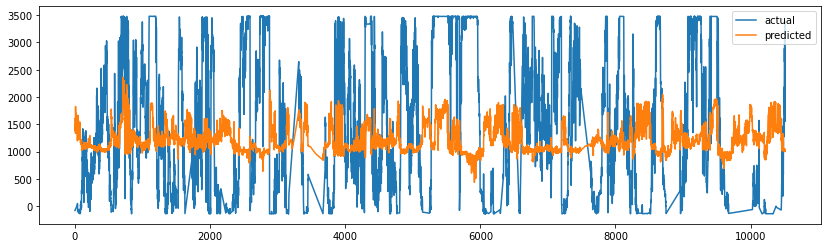

In [186]:
plt.figure(figsize=(14, 4))
#plt.subplot(1, 3, 1)
#plt.plot(y_test,label='actual')
#plt.legend()
#plt.subplot(1, 3, 2)
#plt.plot(wind,label='predicted')
#plt.legend()
#plt.subplot(1, 3, 3)
plt.plot(y_test,label='actual')
plt.plot(wind,label='predicted')
plt.legend()
plt.show()